K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set: 0.8525


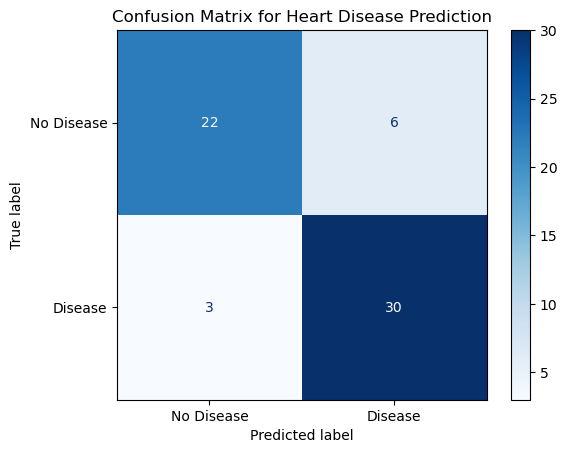

True Negatives: 22
False Positives: 6
False Negatives: 3
True Positives: 30
Sensitivity (True Positive Rate): 0.9091
Specificity (True Negative Rate): 0.7857
Precision (Positive Predictive Value): 0.8333


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  # Added missing import

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv" # The uploaded file name
df = pd.read_csv(file_name)

# 1. Handle unnamed column (likely an index)
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# 2. Data Cleaning and Preparation
# Convert the categorical target ('yes'/'no') to binary (1/0)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert the categorical sex ('male'/'female') to binary (1/0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Handle Missing Values (Imputation)
# Changed strategy from '0' to 'median' which is a valid option
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# 5. Standardize the data (CRUCIAL for KNN)
# This scales features to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the K-Nearest Neighbors (KNN) Classifier
# We'll use the default k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# 7. Evaluate the model
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set: {accuracy:.4f}")
# 9. Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.show()

# 10. Print detailed metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Sensitivity (True Positive Rate): {tp/(tp+fn):.4f}")
print(f"Specificity (True Negative Rate): {tn/(tn+fp):.4f}")
print(f"Precision (Positive Predictive Value): {tp/(tp+fp):.4f}")

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA  # Added PCA import

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv" # The uploaded file name
df = pd.read_csv(file_name)

# 1. Handle unnamed column (likely an index)
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# 2. Data Cleaning and Preparation
# Convert the categorical target ('yes'/'no') to binary (1/0)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert the categorical sex ('male'/'female') to binary (1/0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Handle Missing Values (Imputation)
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# 5. Standardize the data (CRUCIAL for both PCA and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA for dimensionality reduction
# We'll keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)  # Keep components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print information about PCA
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# 7. Train the K-Nearest Neighbors (KNN) Classifier on PCA-transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train)

# 8. Evaluate the model
y_pred = knn_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set after PCA: {accuracy:.4f}")

Number of components selected: 12
Explained variance ratio: [0.20523743 0.11829061 0.09850059 0.08507989 0.07917866 0.07092451
 0.06678531 0.06073169 0.05750343 0.04958713 0.04455327 0.03711909]
Total explained variance: 0.9735
K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set after PCA: 0.8197


Matplotlib is building the font cache; this may take a moment.


Number of components selected: 12
Explained variance ratio: [0.22238856 0.1203218  0.09770574 0.08767617 0.07450799 0.07233829
 0.06671609 0.05887168 0.05321507 0.04914046 0.04010905 0.03224878]
Total explained variance: 0.9752
K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set after PCA: 0.8197


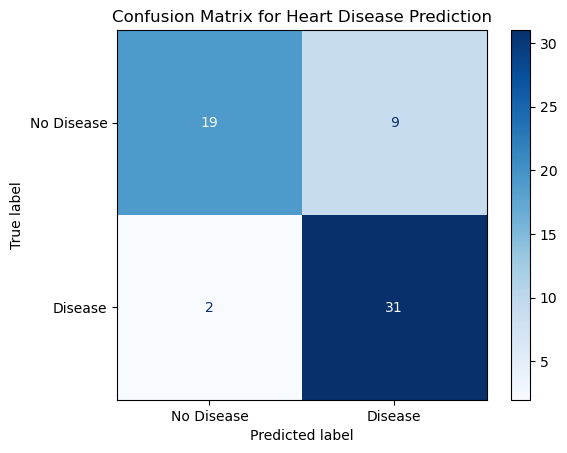

True Negatives: 19
False Positives: 9
False Negatives: 2
True Positives: 31
Sensitivity (True Positive Rate): 0.9394
Specificity (True Negative Rate): 0.6786
Precision (Positive Predictive Value): 0.7750


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  # Added for visualization

# Load the dataset
file_name = "/Users/marileonard/Desktop/DS Capstone/heart disease classification dataset (2).csv" # The uploaded file name
df = pd.read_csv(file_name)

# 1. Handle unnamed column (likely an index)
if df.columns[0].startswith('Unnamed'):
    df = df.iloc[:, 1:]

# 2. Data Cleaning and Preparation
# Convert the categorical target ('yes'/'no') to binary (1/0)
df['target'] = df['target'].map({'yes': 1, 'no': 0})

# Convert the categorical sex ('male'/'female') to binary (1/0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Replace any non-standard missing values (like empty strings) with NaN
df = df.replace('', np.nan)

# Convert all columns to numeric, coercing any non-convertible values (if any) to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# 3. Handle Missing Values (Imputation)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# 5. Standardize the data (CRUCIAL for both PCA and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply PCA for dimensionality reduction
# We'll keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)  # Keep components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print information about PCA
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# 7. Train the K-Nearest Neighbors (KNN) Classifier on PCA-transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train)

# 8. Evaluate the model
y_pred = knn_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"K-Nearest Neighbors (k=5) Classifier Accuracy on the Test Set after PCA: {accuracy:.4f}")

# 9. Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.show()

# 10. Print detailed metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Sensitivity (True Positive Rate): {tp/(tp+fn):.4f}")
print(f"Specificity (True Negative Rate): {tn/(tn+fp):.4f}")
print(f"Precision (Positive Predictive Value): {tp/(tp+fp):.4f}")

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# If you want just the raw numbers without any visualization:
print("Confusion Matrix w/o PCA:")
print(cm)

Confusion Matrix w/o PCA:
[[22  6]
 [ 3 30]]
